<a href="https://colab.research.google.com/github/svyatoslavn1000/data_science_np_pd/blob/lesson_task_3/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22lesson_task_3_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Задание 1.

In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()

boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:

data = boston["data"]
target = boston["target"]

In [ ]:
feature_names = boston["feature_names"]

In [ ]:
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=["price"])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

In [ ]:
# X_train_scaled = scaler.fit_transform(X_train)
# X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

# X_test_scaled = scaler.fit_transform(X_test)
# X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# lr.fit(X_train_scaled, y_train)

# plt.barh(feature_names, lr.coef_.flatten())

# plt.xlabel("Вес признака")
# plt.ylabel("Признак")

# plt.show()

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
check_test = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred.flatten(),
})

In [ ]:
check_test["error"] = check_test["y_pred"] - check_test["y_test"]

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(check_test["y_pred"], check_test["y_test"])

21.5174442311769

In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(check_test["y_pred"], check_test["y_test"])

3.1627098714573685

In [ ]:
lr.intercept_

array([31.63108404])

In [ ]:

lr.coef_

array([[-1.33470103e-01,  3.58089136e-02,  4.95226452e-02,
         3.11983512e+00, -1.54170609e+01,  4.05719923e+00,
        -1.08208352e-02, -1.38599824e+00,  2.42727340e-01,
        -8.70223437e-03, -9.10685208e-01,  1.17941159e-02,
        -5.47113313e-01]])

In [ ]:

from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = 6, 4

%matplotlib inline

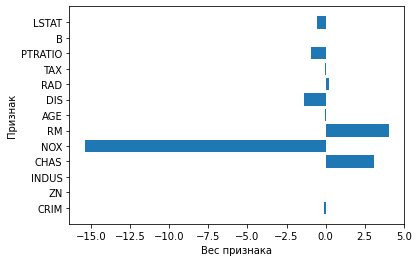

In [ ]:
plt.barh(feature_names, lr.coef_.flatten())
plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()

In [ ]:
from sklearn.metrics import r2_score

###Ппосле стандартизации почему-то резко ухудшились метрики. Хотя даже на глаз видно, что дисперсии признаков численно больше 1.

In [ ]:
r2_score(y_pred, y_test)

0.6693702691495629

##Задание 2.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# parameters = {
#     'n_estimators':1000,
# 'criterion':'gini', 'max_depth':12, 'min_samples_split':2,
# 'min_samples_leaf':1, 'min_weight_fraction_leaf':0.0,
# 'max_features':'auto', 'max_leaf_nodes':None, 'min_impurity_split':1e-07,
# 'bootstrap':True, 'oob_score':False, 'n_jobs':1,
# 'random_state':42, 'verbose':0, 'warm_start':False,
# 'class_weight':None
# }

# clf = GridSearchCV(
#     estimator=RandomForestClassifier(),
#     param_grid=parameters,
#     scoring='accuracy',
#     cv=5
# )

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score


model =  RandomForestRegressor(n_estimators=1000 ,
                               random_state=42,
                               max_depth = 12)
model.fit(X_train, y_train.values[:, 0]) # обучение
y_pred_1 = model.predict(X_test) # предсказание


In [ ]:
r2_score(y_pred_1, y_test)

0.8481499145965063

Случайный лес дает результат лучше, чем регрессия.

##Задание 3.

In [ ]:
help(RandomForestRegressor)

Help on class RandomForestRegressor in module sklearn.ensemble._forest:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is always the same as the original
 |  input sample size but the samples are drawn with replacement if
 |  `bootstrap=True` (default).
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_est

In [ ]:
model.feature_importance_

array([0.03211748, 0.00154999, 0.0070941 , 0.0011488 , 0.01436832,
       0.40270459, 0.01424477, 0.06403265, 0.00496762, 0.01169177,
       0.01808961, 0.0123114 , 0.41567892])

In [ ]:
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Наиболее важные признаки --- 'RM', 'LSTAT'.

##Задание 4.

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [94]:
DATASET_PATH = '/content/drive/MyDrive/creditcard.csv'
#  PREPARED_DATASET_PATH = '/content/drive/MyDrive/creditcard_prepared.csv'

In [99]:
df = pd.read_csv(DATASET_PATH, sep=',')
df = df.drop([0,45645])
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
45640,42436,1.330967,0.662949,-1.089077,0.425743,0.946620,-0.324689,0.366117,-0.157143,-0.528674,-0.579607,0.896037,0.782021,1.353176,-1.438456,0.225836,1.083309,0.218131,1.046931,0.427152,0.067418,-0.176830,-0.418278,-0.279397,-1.107096,0.765716,0.431469,-0.027864,0.021672,0.76,0.0
45641,42436,-2.481639,-2.439949,0.363642,1.216827,2.572442,-1.264220,-0.443652,0.075853,0.073188,0.097421,-1.339838,-0.596440,-0.692792,0.278758,0.871242,-0.750009,0.282120,-0.317401,1.357643,-0.221691,-0.039426,0.480591,1.779358,-0.756700,-0.161099,0.685617,0.223071,0.139619,0.00,0.0
45642,42436,1.223475,0.014944,0.471312,-0.038410,-0.566793,-0.867970,-0.058213,-0.144080,0.164904,-0.248839,0.363145,0.615128,0.421817,0.206175,1.320600,-0.150154,0.071375,-1.101733,-0.414879,-0.076754,-0.053292,-0.093680,0.106348,0.471407,0.135555,0.968336,-0.065171,0.005184,7.49,0.0
45643,42436,1.258657,0.421016,0.325437,0.684259,-0.292529,-1.052786,0.145228,-0.253567,-0.100521,-0.308072,0.083964,0.702541,1.104821,-0.462648,0.997369,0.437119,-0.055465,-0.407290,-0.204127,-0.026262,-0.278029,-0.757417,0.119613,0.369393,0.246145,0.091553,-0.017156,0.032557,0.89,0.0
45644,42437,-0.500147,1.000770,1.809639,-0.114551,0.333865,-0.577076,1.062325,-0.513050,-0.048285,0.314582,0.369958,0.304582,0.527437,-0.395232,1.013454,-0.431934,-0.274147,-1.039753,-0.462377,0.182763,-0.193814,-0.161410,0.036965,0.400154,-0.802486,-0.076097,-0.214317,-0.229160,2.69,0.0


In [100]:
df.value_counts(normalize=True)

Time   V1        V2         V3         V4         V5         V6         V7         V8         V9         V10        V11        V12        V13        V14        V15        V16        V17        V18        V19        V20        V21        V22        V23        V24        V25       V26        V27        V28       Amount  Class
34700  1.107981  -0.197282   1.354658   0.800111  -1.102894  -0.088586  -0.678751   0.176166   0.583884  -0.089457   1.231096   1.452294   0.403263  -0.291173  -0.567763   0.277839  -0.377429   0.135271   0.165867  -0.048710  -0.015908   0.115613   0.030597   0.584963  0.209817   0.284387   0.014954  0.021601  17.39   0.0      0.000088
39897  1.107829  -0.308617   1.096717   0.693355  -0.900647   0.219585  -0.698186   0.234457   0.690956  -0.083681   0.672337   1.019813   0.017692  -0.222940  -0.472589   0.458890  -0.543352   0.372920   0.363896  -0.022280  -0.044824  -0.033311  -0.045893   0.053099  0.257790   0.316330   0.007340  0.018674  36.80   0.0      0.00008

In [101]:
df.info

<bound method DataFrame.info of         Time        V1        V2        V3        V4        V5        V6  \
1          0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2          1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3          1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4          2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
5          2 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728   
...      ...       ...       ...       ...       ...       ...       ...   
45640  42436  1.330967  0.662949 -1.089077  0.425743  0.946620 -0.324689   
45641  42436 -2.481639 -2.439949  0.363642  1.216827  2.572442 -1.264220   
45642  42436  1.223475  0.014944  0.471312 -0.038410 -0.566793 -0.867970   
45643  42436  1.258657  0.421016  0.325437  0.684259 -0.292529 -1.052786   
45644  42437 -0.500147  1.000770  1.809639 -0.114551  0.333865 -0.577076   

             V7        V8        V9       V10       V11

In [102]:
pd.options.display.max_columns = 100
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.0
10,10,1.449044,-1.176339,0.913860,-1.375667,-1.971383,-0.629152,-1.423236,0.048456,-1.720408,1.626659,1.199644,-0.671440,-0.513947,-0.095045,0.230930,0.031967,0.253415,0.854344,-0.221365,-0.387226,-0.009302,0.313894,0.027740,0.500512,0.251367,-0.129478,0.042850,0.016253,7.80,0.0


In [103]:
X = df.drop(['Class'], axis = 1)


In [104]:
y = df['Class']


In [105]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [106]:
parameters = [{'n_estimators': [10, 15],
'max_features': np.arange(3, 5),
'max_depth': np.arange(4, 7)}]

In [112]:
estimator.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [114]:
clf = GridSearchCV(estimator=RandomForestClassifier(random_state=100), param_grid=parameters,scoring='roc_auc', cv=3)

In [119]:
clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                 

In [120]:
clf.best_params_


{'max_depth': 5, 'max_features': 3, 'n_estimators': 15}

In [122]:
clf = RandomForestClassifier(max_depth=5, max_features=3, n_estimators=15)

In [124]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [125]:
clf.predict_proba

<bound method ForestClassifier.predict_proba of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

In [129]:
from sklearn.metrics import roc_auc_score

In [135]:
y_pred_proba = clf.predict(X_test)

In [136]:
roc_auc_score(y_test, y_pred_proba)
roc_auc_score(y_train, y_pred_proba)

ValueError: ignored